In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [27]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

In [0]:
with open('/content/irish-lyrics-eof.txt','r') as f:
  text=f.read().splitlines() 

In [31]:
len(text)

1692

# Preparing The Text Data

In [0]:
tokenizer=Tokenizer()

In [0]:
tokenizer.fit_on_texts(text)

In [34]:
word_index=tokenizer.word_index
vocab_size=len(word_index)+1
vocab_size

2690

### Creating NGram Tokens

In [35]:
input_sequence=[]
for line in text:
  tokens=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(tokens)):
    n_grams=tokens[:i+1]
    input_sequence.append(n_grams)

print(input_sequence)

[[51, 12], [51, 12, 96], [51, 12, 96, 1217], [51, 12, 96, 1217, 48], [51, 12, 96, 1217, 48, 2], [51, 12, 96, 1217, 48, 2, 69], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 361], [2, 11, 15, 31, 361, 8], [2, 11, 15, 31, 361, 8, 24], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798], [272, 798, 2], [272, 798, 2, 204], [272, 798, 2, 204, 24], [272, 798, 2, 204, 24, 579], [272, 798, 2, 204, 24, 579, 69], [118, 35], [118, 35, 119], [118, 35, 119, 799], [118, 35, 119, 799, 56], [118, 35, 119, 799, 56, 24], [118, 35, 119, 799, 56, 24, 184], [10, 184], [10, 184, 25], [10, 184, 25, 23], [10, 184, 25, 23, 5], [10, 184, 25, 23, 5, 580], [10, 184, 25, 23, 5, 580, 456], [2, 184], [2, 184, 800], [2, 184, 800, 12], [2, 184, 800, 12, 801], [2, 184, 800, 12, 801, 4], [2, 184, 800, 12, 801, 4, 7], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17], [1219, 17, 12], [1219, 17, 12, 75], [1219, 17, 12, 75, 1220], [1219, 17, 12, 75, 1220, 236], [1219, 17, 12, 75, 1220, 236, 17], [1219, 17, 12, 75, 1220, 236

In [36]:
max_sequence_len = max([len(x) for x in input_sequence])
max_sequence_len

16

### Padding Tokens

In [0]:
input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_len, padding='pre')

In [38]:
input_sequence

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]], dtype=int32)

### Creating Predictors and Labels

In [0]:
predictors=input_sequence[:,:-1]
label=input_sequence[:,-1]

### Creating Encoding for Classes

In [0]:
label = ku.to_categorical(label, num_classes=vocab_size)

# Building Models

### Bidirectional Multilayer LSTM

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sequence_len-1))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(vocab_size, activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 15, 256)           234496    
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              691330    
Total params: 1,589,066
Trainable params: 1,589,066
Non-trainable params: 0
____________________________________________

In [44]:
history = model.fit(predictors, label, epochs = 150)

Epoch 1/150
377/377 [==============================] - 6s 15ms/step - loss: 6.7354 - accuracy: 0.0638
Epoch 2/150
377/377 [==============================] - 6s 15ms/step - loss: 6.2590 - accuracy: 0.0734
Epoch 3/150
377/377 [==============================] - 6s 15ms/step - loss: 6.0628 - accuracy: 0.0821
Epoch 4/150
377/377 [==============================] - 6s 15ms/step - loss: 5.9028 - accuracy: 0.0889
Epoch 5/150
377/377 [==============================] - 6s 15ms/step - loss: 5.7616 - accuracy: 0.0935
Epoch 6/150
377/377 [==============================] - 6s 15ms/step - loss: 5.6172 - accuracy: 0.0998
Epoch 7/150
377/377 [==============================] - 6s 15ms/step - loss: 5.4801 - accuracy: 0.1061
Epoch 8/150
377/377 [==============================] - 6s 15ms/step - loss: 5.3335 - accuracy: 0.1132
Epoch 9/150
377/377 [==============================] - 6s 15ms/step - loss: 5.1939 - accuracy: 0.1213
Epoch 10/150
377/377 [==============================] - 6s 15ms/step - loss: 5.046

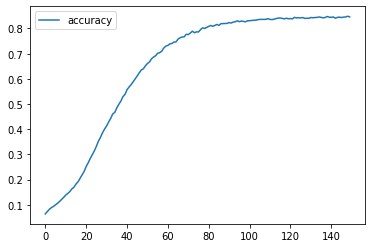

In [45]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()